In [ ]:
# Upload file kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mengambil dataset kaggle 
! kaggle datasets download akbarsigitputra/vehicle-dataset

 96% 85.0M/88.8M [00:00<00:00, 314MB/s]
100% 88.8M/88.8M [00:00<00:00, 298MB/s]


In [ ]:
! unzip /content/vehicle-dataset.zip

In [ ]:
! rm /content/vehicle-dataset.zip

In [ ]:
# Import Library
# Library keras digunakan untuk membuat arsitektur

import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [ ]:
img_size = 128

#ImageDataGenerator lets you augment your images in real-time while your model is still training!
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 10,
                horizontal_flip = True
)

train_set = train_datagen.flow_from_directory('/content/Vehicle_Dataset/train',
                                              target_size = (img_size, img_size),
                                              class_mode = "sparse",)

Found 6812 images belonging to 24 classes.


In [ ]:
test_datagen = ImageDataGenerator(
              rescale = 1./255,
              rotation_range = 10,
              horizontal_flip = True)

test_set = test_datagen.flow_from_directory('/content/Vehicle_Dataset/test',
                                            target_size = (img_size, img_size),
                                            class_mode = "sparse")

Found 1183 images belonging to 24 classes.


In [ ]:
class_names = list(train_set.class_indices.keys())
class_names

['Audi',
 'Bmw Series 1',
 'Chevrolet Aveo',
 'Chevrolet Spark',
 'Clio',
 'Duster',
 'Golf',
 'Hyundai Creta',
 'Hyundai Tucson',
 'Hyundai i10',
 'Mahindra Scorpio',
 'Megane',
 'Mercedes Class A',
 'Non Vehicles',
 'Octavia',
 'Picanto',
 'Polo',
 'Rolls Royce',
 'Sandero',
 'Swift',
 'Tata Safari',
 'Toyota Corolla',
 'Toyota Innova',
 'Volkswagen Tiguan']

In [ ]:
# Variabel untuk memudahkan membuat arsitektur dengan mencari jumlah kategori folder
folders = glob('/content/Vehicle_Dataset/train/*')
img_sz = 128

In [ ]:
# Membuat Arsitektur berdasarkan LeNet5
# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation = 'relu', input_shape = (img_sz, img_sz, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units = 220, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(units = 72, activation = 'relu'))
model.add(Dense(units = len(folders), activation='softmax')) # softmax for more than 2 classification

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 28800)             0         
                                                                 
 dense_14 (Dense)            (None, 220)              

In [ ]:
# Melakukan Fitting Model dengan perbandingan test_set
EPOCHS = 50

model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

history = model.fit(
    train_set,
    validation_data = test_set,
    epochs = EPOCHS
)

Epoch 1/50
213/213 [==============================] - 36s 169ms/step - loss: 2.5167 - accuracy: 0.2769 - val_loss: 2.0135 - val_accuracy: 0.3872
Epoch 2/50
213/213 [==============================] - 36s 167ms/step - loss: 2.0907 - accuracy: 0.3743 - val_loss: 1.8216 - val_accuracy: 0.4438
Epoch 3/50
213/213 [==============================] - 36s 168ms/step - loss: 1.8575 - accuracy: 0.4363 - val_loss: 1.5665 - val_accuracy: 0.5038
Epoch 4/50
213/213 [==============================] - 36s 168ms/step - loss: 1.6946 - accuracy: 0.4806 - val_loss: 1.4711 - val_accuracy: 0.5402
Epoch 5/50
213/213 [==============================] - 37s 173ms/step - loss: 1.5422 - accuracy: 0.5255 - val_loss: 1.4997 - val_accuracy: 0.5418
Epoch 6/50
213/213 [==============================] - 36s 167ms/step - loss: 1.4045 - accuracy: 0.5672 - val_loss: 1.2640 - val_accuracy: 0.5850
Epoch 7/50
213/213 [==============================] - 36s 168ms/step - loss: 1.2839 - accuracy: 0.5893 - val_loss: 1.2121 - val_ac

In [ ]:
# Mengevaluasi Model melihat akurasi dan loss model
scores = model.evaluate(test_set)
print(f"Akurasi = {np.round(scores[1] * 100)} %")

37/37 [==============================] - 6s 157ms/step - loss: 1.0159 - accuracy: 0.7405
Akurasi = 74.0 %


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

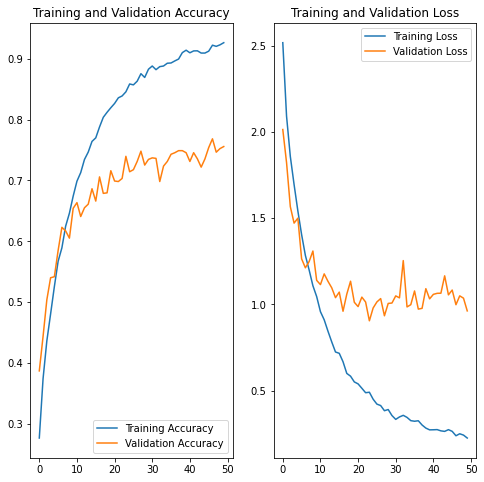

In [ ]:
# Melihat akurasi model dari tiap percobaan fitting

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Fungsi Untuk memprediksi kategori Gambar

def predict(model, img):
    img_array = img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

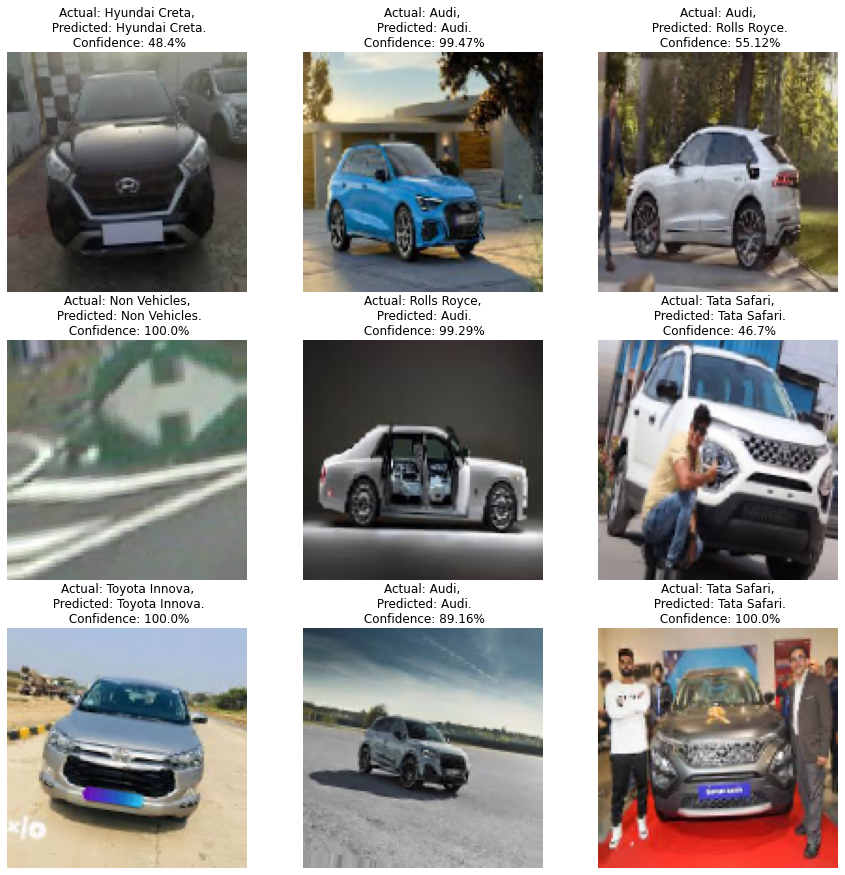

In [ ]:
# Mencoba melihat akurasi prediksi dari model dengan data dari test

plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Found 18 images belonging to 1 classes.


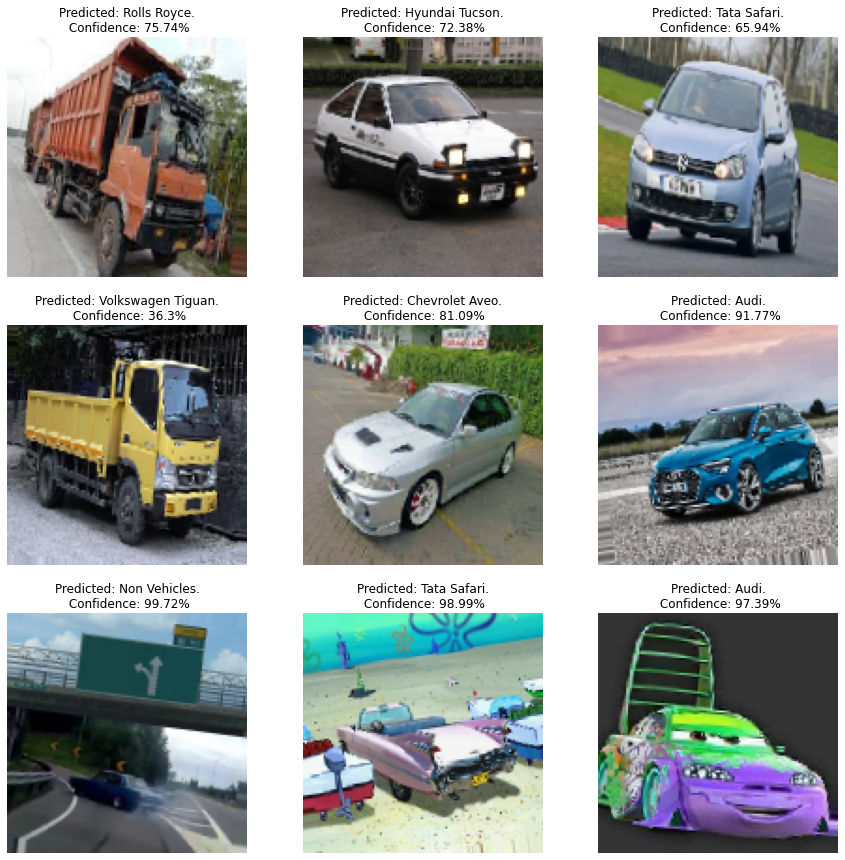

In [ ]:
# Mencoba melihat akurasi prediksi dari model dengan data dari foto random diluar train dan tesr

random_datagen = ImageDataGenerator(
              rescale = 1./255,
              rotation_range = 10,
              horizontal_flip = True)

random_set = random_datagen.flow_from_directory('/content/Vehicle_Dataset/random',
                                                target_size = (img_size, img_size),
                                                class_mode = "sparse")

plt.figure(figsize=(15, 15))
for images, labels in random_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        
        plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break